### 다중 회귀
- 다중의 독립변수가 있는 회귀 분석
- 여러 개의 독립 변수가 복합적으로 종속 변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 표현할 수 있다.
- 다중 회귀에서 최적 모델을 결정하기 위해 다양한 방법으로 변수를 선택
- 모델이 복잡해지면 과대적합이 발생할 가능성이 있어 이를 방지하고자 다양한 규제를 적용해 모델의 가중치를 제한

### 릿지
- 최소 제곱 적합식의 수축 패널티라 불리는 항에 L2 패널티를 추가한 것

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

In [2]:
## 데이터 로드
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [4]:
from sklearn.linear_model import Ridge
alpha = np.logspace(-3,1,5)

data = []

for i, a in enumerate(alpha):
    ## alpha= 정규화의 강도를 지정
    ridge = Ridge(alpha= a)
    ridge.fit(x,y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


In [5]:
import matplotlib.pyplot as plt

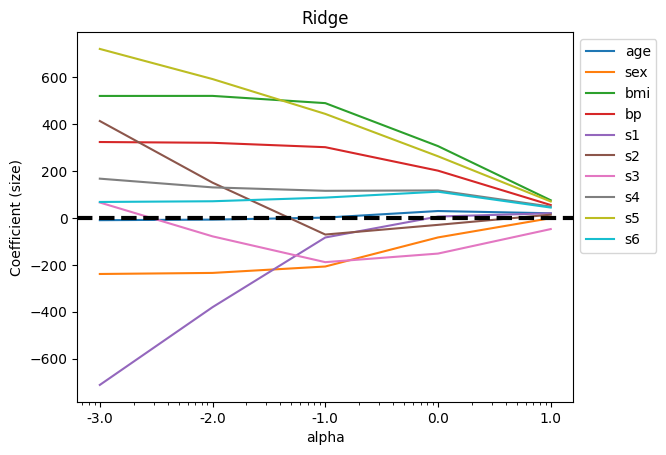

In [6]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

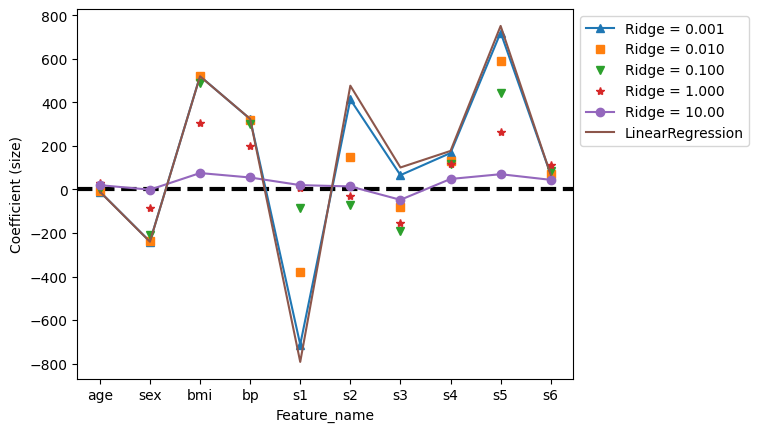

In [10]:
## MSE를 사용한 회귀 모델과 비교
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x,y)

plt.axhline(y= 0, linestyle= '--', color = 'black', linewidth=3)
plt.plot(df_ridge.loc[0.001], '^-', label = 'Ridge = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label = 'Ridge = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label = 'Ridge = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label = 'Ridge = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label = 'Ridge = 10.00')
plt.plot(lr.coef_, label='LinearRegression')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Feature_name')
plt.ylabel('Coefficient (size)')
plt.show()

### 라쏘
- 최소 제곱 적합식의 수축 패널티라 불리는 항에 L1 패널티를 추가한 것
- 릿지 회귀가 변수의 크기가 매우 큰 데이터인 경우 결과를 해석하는 데 어려움 발생하는데 이러한 문제점을 해결하기 위한 방법

In [ ]:
from sklearn.line_model import Lasso